# OkCupid: Dataset Analysis

This is a notebook I am using to test out the feasibility of using the [OkCupid Dataset](https://github.com/rudeboybert/JSE_OkCupid) for our first workshop.

In [10]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

#constants
%matplotlib inline
sns.set_style("dark")
sigLev = 3
figWidth = figHeight = 5

# Dataset Information

Before starting with the analysis of this dataset, it will be important to study the codebook of variables in ```data/JSE_OkCupid/okcupid_codebook.txt```. Some important notes I found from viewing this codebook:

* Contains Profiles from 25 Mile Radius outside of San Francisco, with at least one profile picture.

* Data Scraped in 2012.

* Contains $n = 59946$ observations; This is a mid-sized dataset, with a lot of information, although nont big-data unweildy.

* Contains a mix of different demographic and lifestyle data, along with some textual data in the ```essay``` variables.

With that in mind, let's get started with the data.

In [3]:
okCupidFrame = pd.read_csv("data/JSE_OkCupid/profiles.csv")

# Assessing Data Quality

As is usual for starting data analyses, let's assess some aspects of data quality.

In [4]:
numObservations = okCupidFrame.shape[0]
numFeatures = okCupidFrame.shape[1]

As discussed in the codebook, we see that we have {{numObservations}} profiles in this dataset. We also have {{numFeatures}} variables in this dataset, and given that some of these variables are language data (see [the dataset's codebook](data/JSE_OkCupid/okcupid_codebook.txt)), this dataset can be very high-dimensional if we choose to transform it in that manner.

Let us study how many missing values we have in this dataset.

In [13]:
#make numMissing for a given column
def numMissing(col):
    #helper that checks the number of observations missing from a given col
    missingRows = col[col.isnull()]
    return missingRows.shape[0]
#then apply over our feature set
missingSummaryFrame = okCupidFrame.apply(numMissing,axis = 0)
display(missingSummaryFrame)

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5485
essay1          7571
essay2          9638
essay3         11476
essay4         10537
essay5         10847
essay6         13771
essay7         12450
essay8         19214
essay9         12602
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

_Table 1: Counts of the number of observations missing per variable._

We see that we have variables with many missing variables, and this is especially consistent with the language data (i.e. the ```essay``` variables). This may suggest that we want to target a particular variable that generally has fewer misisng observations. Let us try out targeting the ```age``` variable.

# Summary Statistics and EDA

Let us start by studying the distribution of our target variable ```age``` and some of the potentially relevant variables for determining age of someone on OkCupid.

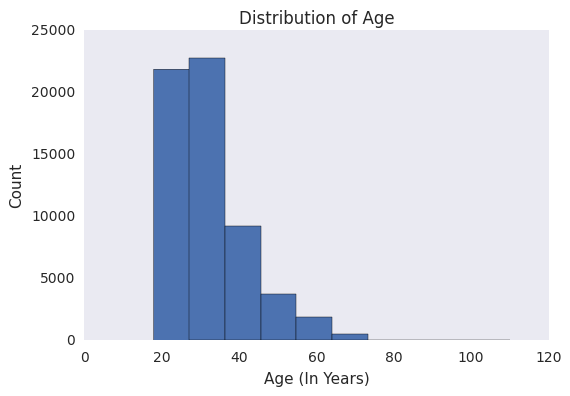

In [15]:
#plot age
plt.hist(okCupidFrame["age"])
#then make some labels
plt.xlabel("Age (In Years)")
plt.ylabel("Count")
plt.title("Distribution of Age")

_Figure 1: Distribution of Age._

We see that the distribution of age is fairly young, with most people being around $20$ to $35$ years old. We see that the distribution is relatively right-skewed, with fewer observations among middle-aged individuals. This may have an effect towards a relatively imbalanced regression.

Perhaps income might be useful in determining age, as generally older persons tend to have higher incomes from being farther in their careers. Let us study the distribution of income.

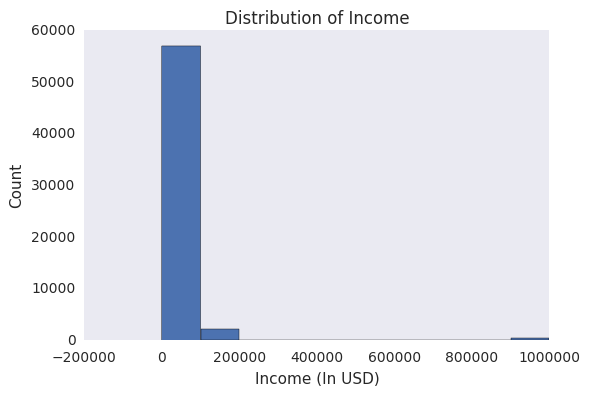

In [16]:
plt.hist(okCupidFrame["income"])
plt.xlabel("Income (In USD)")
plt.ylabel("Count")
plt.title("Distribution of Income")